In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Libraries**

In [2]:
!pip install tabulate
!pip uninstall umap
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.4 MB/s eta 0:00:00


In [3]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 490, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 490 (delta 149), reused 124 (delta 91), pack-reused 269 (from 1)
Receiving objects: 100% (490/490), 136.70 KiB | 795.00 KiB/s, done.
Resolving deltas: 100% (251/251), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 2.4 MB/s eta 0:00:00
Installing the rest of the RAPIDS 24.4.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.9/920.9 kB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!git clone https://github.com/ealeongomez/Data.git

Cloning into 'Data'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 38 (delta 6), reused 27 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (38/38), 17.25 MiB | 7.15 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Updating files: 100% (14/14), done.


In [5]:
!git clone https://github.com/ealeongomez/Predictive-Modeling-Using-a-Clustering-Based-Approach.git

Cloning into 'Predictive-Modeling-Using-a-Clustering-Based-Approach'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 70 (delta 19), reused 65 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (70/70), 27.64 MiB | 14.51 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [6]:
# Basic packages
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA
from umap import UMAP
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [7]:
import cuml
import cudf
import os.path

from cuml.manifold.umap import UMAP as cuUMAP

In [8]:
os.chdir('/content/Predictive-Modeling-Using-a-Clustering-Based-Approach')

In [9]:
ls -l

total 3632
-rw-r--r-- 1 root root 1225140 Aug 15 13:42 Argone_IL.ipynb
-rw-r--r-- 1 root root 1212593 Aug 15 13:42 Beijing_Airport_China.ipynb
-rw-r--r-- 1 root root 1214371 Aug 15 13:42 Chengdu_Airport_China.ipynb
-rw-r--r-- 1 root root    1805 Aug 15 13:42 comparation.py
-rw-r--r-- 1 root root    2980 Aug 15 13:42 Final.py
drwxr-xr-x 2 root root    4096 Aug 15 13:42 Functions/
drwxr-xr-x 2 root root    4096 Aug 15 13:42 pkl/
-rw-r--r-- 1 root root    4868 Aug 15 13:42 plotter_individual.py
-rw-r--r-- 1 root root    4330 Aug 15 13:42 plotter.py
-rw-r--r-- 1 root root    1781 Aug 15 13:42 plot_TimeSeries.py
drwxr-xr-x 2 root root    4096 Aug 15 13:42 Proofs/
-rw-r--r-- 1 root root      56 Aug 15 13:42 README.md
-rw-r--r-- 1 root root     662 Aug 15 13:42 Resultados.eps
drwxr-xr-x 2 root root    4096 Aug 15 13:42 results/
drwxr-xr-x 3 root root    4096 Aug 15 13:42 stac/


In [10]:
from Proofs.Functions import ForecastingModels
from Proofs.organizeData import selectSamples

#**Variables**

In [11]:
neurons = 50
epochs = 50
predictionHorizonMax = 7
window = 10
data_timeSerie = 'Chengdu_Airport_China'
n_clusters = 1000
n_splits = 20
thresholds = [1, 10, 100, 500, 1000]
batch_size = 25000
normalizationValue = 44.71

In [12]:
dataSet = {}

#**Load data**

Dataset 1: Argonne

In [13]:
df_1 = pd.read_csv("/content/Data/WindSpeed/Argone_IL.txt", sep="\t",  names=['yyyymmdd','hhmn','mph','code'])

df_1.head()

,yyyymmdd,hhmn,mph,code
0,19480101,100,10.92,131
1,19480101,200,10.92,131
2,19480101,300,10.92,131
3,19480101,400,10.92,131
4,19480101,500,10.92,131


35.34 0.0


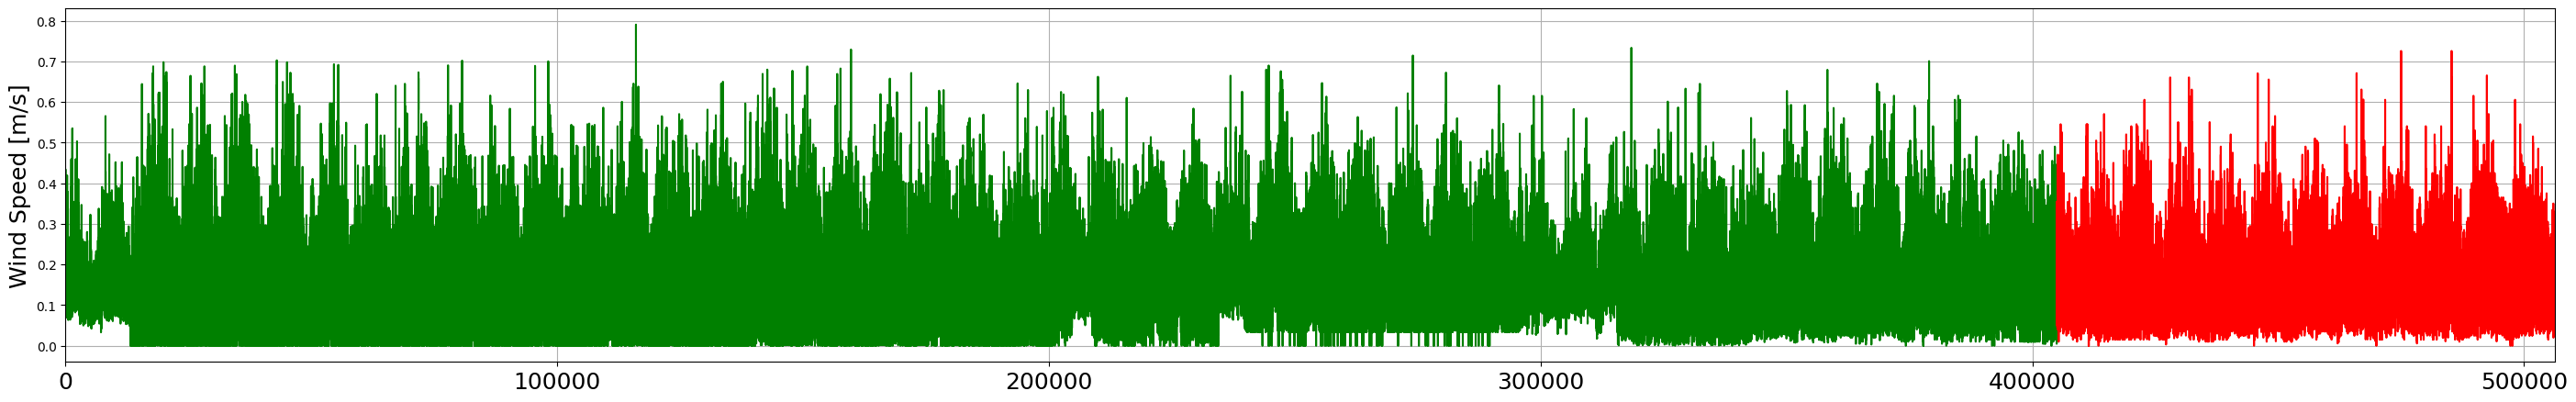

In [14]:
df_1["sped"] = pd.to_numeric(df_1["mph"], downcast="float")
timeSerie_1 = df_1.iloc[:,2].values

valueMax = max(timeSerie_1)
print(max(timeSerie_1), min(timeSerie_1))
val = valueMax

timeSerie_1 = (timeSerie_1-min(timeSerie_1))/(normalizationValue-min(timeSerie_1))
samples = round(len(timeSerie_1)*0.80)

timeSerie_training_1 = timeSerie_1[0:samples]
timeSerie_test_1     = timeSerie_1[samples:]
time_1 = np.arange(0, len(timeSerie_1),1)

# Ploter el conjunto de datos
plt.figure(figsize=(35,5))
plt.plot(time_1[0:samples], timeSerie_1[0:samples], 'g', label= 'Training samples')
plt.plot(time_1[samples:], timeSerie_1[samples:], 'r', label= 'Test')
plt.xticks(fontsize=18)
plt.ylabel('Wind Speed [m/s]', fontsize=18)
plt.xlim(0, timeSerie_1.shape[0])
#plt.legend(ncol=3, prop={'size': 18})
plt.grid(True)
plt.show()

In [15]:
selectSamples_ = selectSamples(timeSerie_training_1, predictionHorizonMax, window)
X_, y_ = selectSamples_.SerieMatriz()

selectSamples_test = selectSamples(timeSerie_test_1, predictionHorizonMax, window)
X_test, y_test = selectSamples_test.SerieMatriz()

dataSet.update({'Argone_IL':{'train': [X_, y_], 'test':[X_test, y_test]}})

X_.shape, y_.shape, X_test.shape, y_test.shape

((404970, 10), (404970, 7), (101230, 10), (101230, 7))

**DataSet 2: Beijing_Airport_China**

In [16]:
df_2 = pd.read_csv('/content/Data/WindSpeed/Beijing_Airport_China.txt', delimiter=",")

df_2.head()

,station,valid,sped
0,ZBAA,2011-08-01 00:00,2.24
1,ZBAA,2011-08-01 00:30,2.24
2,ZBAA,2011-08-01 01:00,2.24
3,ZBAA,2011-08-01 01:30,2.24
4,ZBAA,2011-08-01 02:00,4.47


44.71 0.0


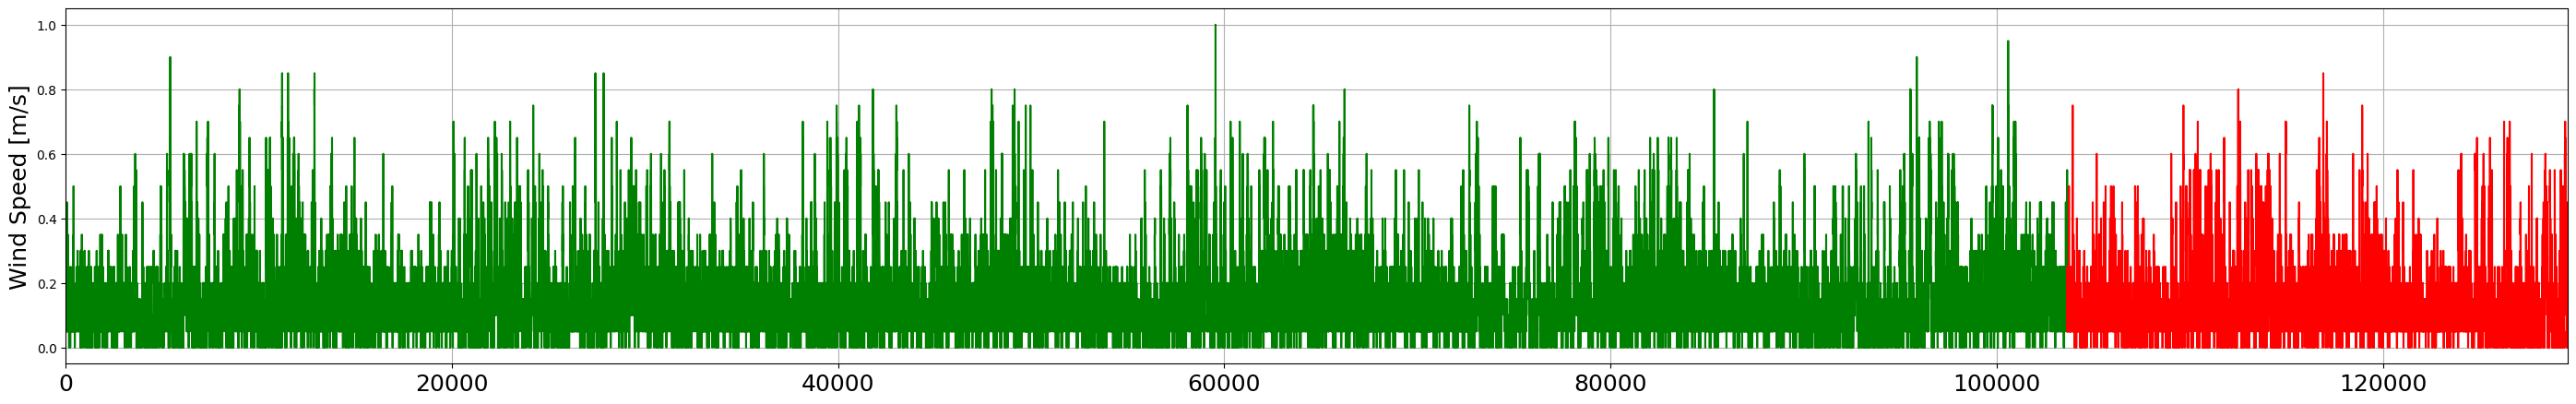

In [17]:
df_2["sped"] = pd.to_numeric(df_2["sped"], downcast="float")
timeSerie_2 = df_2.iloc[:,2].values

valueMax = max(timeSerie_2)
print(max(timeSerie_2), min(timeSerie_2))
val = valueMax

timeSerie_2 = (timeSerie_2-min(timeSerie_2))/(normalizationValue-min(timeSerie_2))

samples = round(len(timeSerie_2)*0.80)

timeSerie_training_2 = timeSerie_2[0:samples]
timeSerie_test_2     = timeSerie_2[samples:]
time_2 = np.arange(0, len(timeSerie_2),1)

# Ploter el conjunto de datos
plt.figure(figsize=(35,5))
plt.plot(time_2[0:samples], timeSerie_2[0:samples], 'g', label= 'Training samples')
plt.plot(time_2[samples:], timeSerie_2[samples:], 'r', label= 'Test')
plt.xticks(fontsize=18)
plt.ylabel('Wind Speed [m/s]', fontsize=18)
plt.xlim(0, timeSerie_2.shape[0])
#plt.legend(ncol=3, prop={'size': 18})
plt.grid(True)
plt.show()

In [18]:
selectSamples_ = selectSamples(timeSerie_training_2, predictionHorizonMax, window)
X_, y_ = selectSamples_.SerieMatriz()

selectSamples_test = selectSamples(timeSerie_test_2, predictionHorizonMax, window)
X_test, y_test = selectSamples_test.SerieMatriz()

dataSet.update({'Beijing_Airport_China':{'train': [X_, y_], 'test':[X_test, y_test]}})

X_.shape, y_.shape, X_test.shape, y_test.shape

((103630, 10), (103630, 7), (25895, 10), (25895, 7))

**Dataset 3: Chengdu_Airport_China**

In [19]:
df_3 = pd.read_csv("/content/Data/WindSpeed/Chengdu_Airport_China.txt", sep=",")

df_3.head()

,station,valid,sped
0,ZUUU,2011-01-01 00:00,8.94
1,ZUUU,2011-01-01 01:00,4.47
2,ZUUU,2011-01-01 02:00,6.71
3,ZUUU,2011-01-01 03:00,6.71
4,ZUUU,2011-01-01 04:00,6.71


33.53 0.0


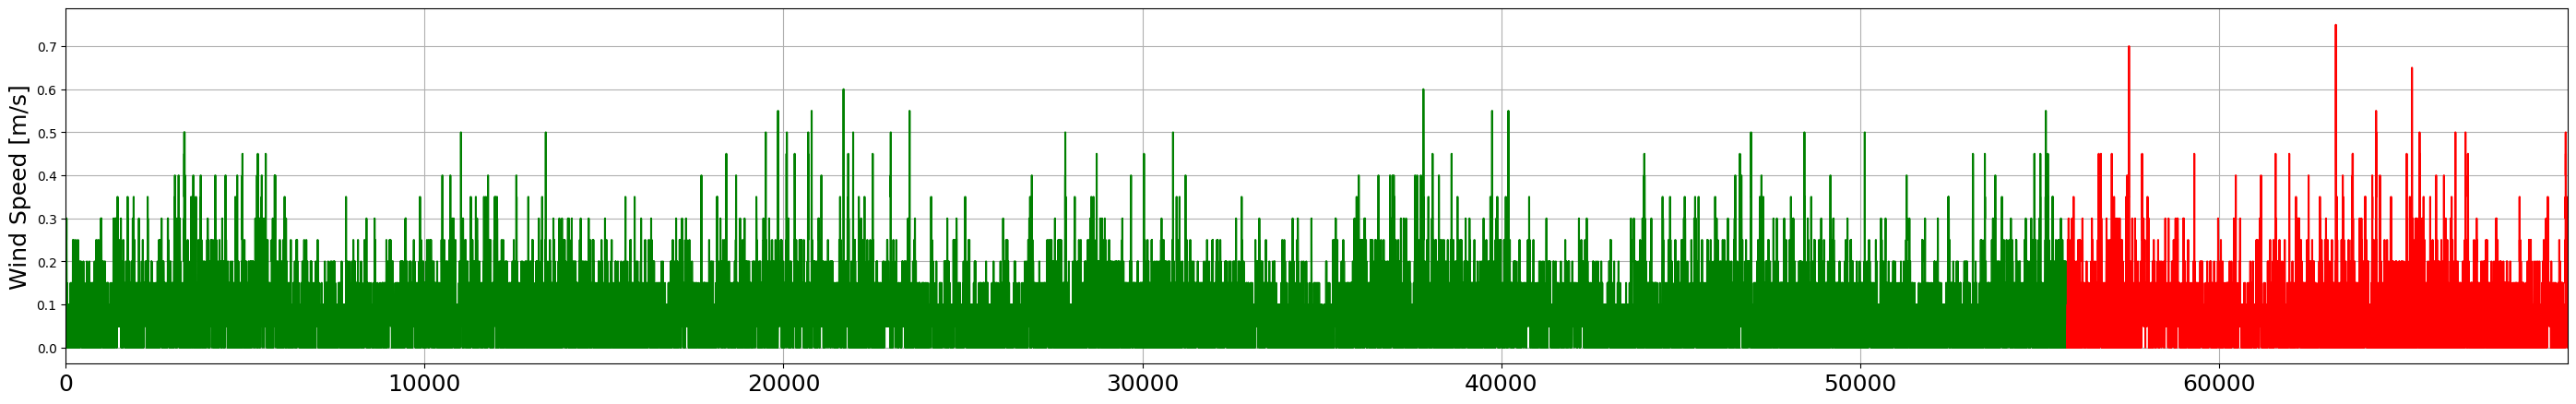

In [20]:
df_3["sped"] = pd.to_numeric(df_3["sped "], downcast="float")
timeSerie_3 = df_3.iloc[:,2].values

valueMax = max(timeSerie_3)
print(max(timeSerie_3), min(timeSerie_3))
val = valueMax

timeSerie_3 = (timeSerie_3-min(timeSerie_3))/(normalizationValue-min(timeSerie_3))
samples = round(len(timeSerie_3)*0.80)

timeSerie_training_3 = timeSerie_3[0:samples]
timeSerie_test_3     = timeSerie_3[samples:]
time_3 = np.arange(0, len(timeSerie_3),1)

# Ploter el conjunto de datos
plt.figure(figsize=(35,5))
plt.plot(time_3[0:samples], timeSerie_3[0:samples], 'g', label= 'Training samples')
plt.plot(time_3[samples:], timeSerie_3[samples:], 'r', label= 'Test')
plt.xticks(fontsize=18)
plt.ylabel('Wind Speed [m/s]', fontsize=18)
plt.xlim(0, timeSerie_3.shape[0])
#plt.legend(ncol=3, prop={'size': 18})
plt.grid(True)
plt.show()

In [21]:
selectSamples_ = selectSamples(timeSerie_training_3, predictionHorizonMax, window)
X_, y_ = selectSamples_.SerieMatriz()

selectSamples_test = selectSamples(timeSerie_test_3, predictionHorizonMax, window)
X_test, y_test = selectSamples_test.SerieMatriz()

dataSet.update({'Chengdu_Airport_China':{'train': [X_, y_], 'test': [X_test, y_test]}})

X_.shape, y_.shape, X_test.shape, y_test.shape

((55754, 10), (55754, 7), (13927, 10), (13927, 7))

#**Select samples**

**Alls data**

In [22]:
X, y, label_data = np.empty(shape=[0, window]), np.empty(shape=[0, predictionHorizonMax]), np.empty(shape=[0, 1])
count = 0

for dataName in list(dataSet.keys()):
  print(dataName, len(dataSet[dataName]['train'][0]))
  X = np.vstack((X, dataSet[dataName]['train'][0]))
  y = np.vstack((y, dataSet[dataName]['train'][1]))
  label_aux = np.zeros(len(dataSet[dataName]['train'][0]))[:,np.newaxis] + count
  count += 1
  label_data = np.vstack((label_data, label_aux))

label_data = np.squeeze(label_data)

Argone_IL 404970
Beijing_Airport_China 103630
Chengdu_Airport_China 55754


In [23]:
X.shape, y.shape, label_data.shape

((564354, 10), (564354, 7), (564354,))

**Training data**

In [24]:
X_data = dataSet[data_timeSerie]['train'][0]
y_data = dataSet[data_timeSerie]['train'][1]

X_data.shape, y_data.shape

((55754, 10), (55754, 7))

**Test data**

In [25]:
X_test = dataSet[data_timeSerie]['test'][0]
y_test = dataSet[data_timeSerie]['test'][1]

X_test.shape, y_test.shape

((13927, 10), (13927, 7))

**Centroids for alls data**

In [26]:
# Estandarización de las características
sc = StandardScaler()
X_aux_centroids = sc.fit_transform(X)

# Muestreo aleatorio para seleccionar centroides
random_indices = np.random.choice(X_aux_centroids.shape[0], n_clusters, replace=False)
X_train_centroids, label_aux_centroids = X_aux_centroids[random_indices], label_data[random_indices]

X_train_centroids.shape, label_aux_centroids.shape

((1000, 10), (1000,))

# **UMAP**

$$ p_{j|i} = \exp \left( - \frac{d(\textbf{x}_i, \textbf{x}_j) - ρ_i}{\sigma_i} \right)  $$

- $d(\textbf{x}_i, \textbf{x}_j)$ represents the distance between $\textbf{x}_i$ and $\textbf{x}_j$  

- $\sigma_i$ is the standard desviation for the gaussian distribution

- $\rho_i$ is a local connectivity parameter set the distance from $\textbf{x}_i$ upon its $K$ nearest neighbors

- $K$ is a hyperparameter

$$q_{ij} = (1 + a || \textbf{z}_i - \textbf{z}_j ||^{2b})^{-1}$$

where a and b are hyperparameters set based on a desired minimum distance between points in embedding space

In [27]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

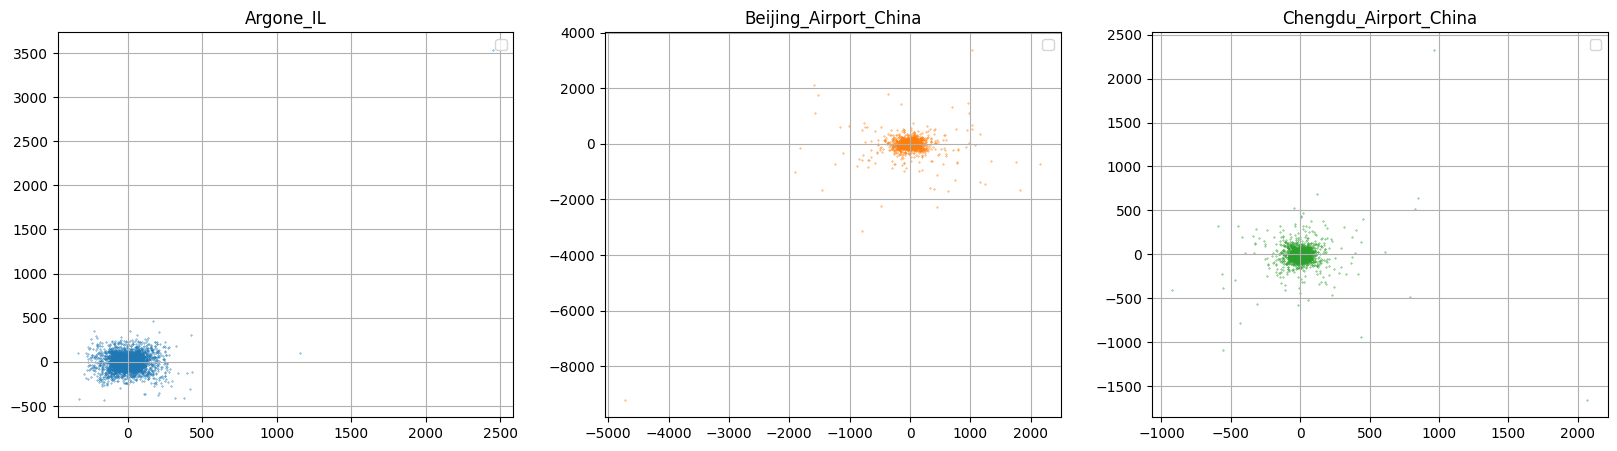

In [28]:
# Euclidean distance
cuumap = cuUMAP(n_components=2,             # The dimension of the space to embed into.
                n_neighbors=3,              # The size of local neighborhood (from 1 to 100)
                local_connectivity=1,    # rho
                random_state=42,
                n_epochs=100,               # The number of iterations to run
                learning_rate=0.01          # The learning rate
                )

tranformed_umap_all = cuumap.fit_transform(X_aux_centroids)

count = 1
plt.figure(figsize=(20,5))
for i, color in zip(np.unique(label_aux_centroids), colors):
  plt.subplot(1,3,count)
  name = "{dataSet}".format(dataSet=list(dataSet.keys())[int(i)])
  #plt.scatter(tranformed_umap_all[label_data==i, 0], tranformed_umap_all[label_data==i, 1], s=0.1, alpha=0.1, c=color)
  plt.scatter(tranformed_umap_all[label_data==i, 0], tranformed_umap_all[label_data==i, 1], s=0.1, c=color)
  #plt.xlim(-500,500)
  #plt.ylim(-500,500)
  plt.title(name)
  plt.legend()
  plt.grid();
  count += 1

plt.show()


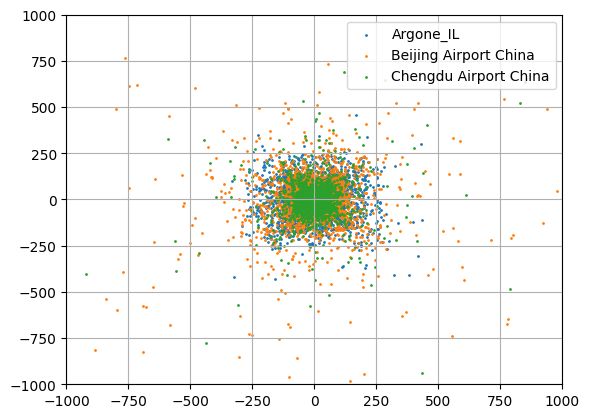

In [29]:
plt.figure()
plt.scatter(tranformed_umap_all[label_data==0, 0], tranformed_umap_all[label_data==0, 1], s=1, label="Argone_IL")
plt.scatter(tranformed_umap_all[label_data==1, 0], tranformed_umap_all[label_data==1, 1], s=1, label="Beijing Airport China")
plt.scatter(tranformed_umap_all[label_data==2, 0], tranformed_umap_all[label_data==2, 1], s=1, label="Chengdu Airport China")

plt.xlim(-1000,1000)
plt.ylim(-1000,1000)

plt.legend()
plt.grid();
plt.show()

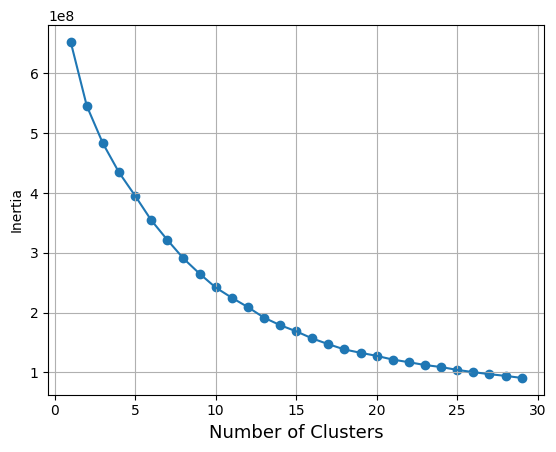

In [30]:
inertia_list = []
for num_clusters in range(1, 30):
    kmeans_model = KMeans(n_clusters=num_clusters)
    kmeans_model.fit(tranformed_umap_all)
    inertia_list.append(kmeans_model.inertia_)

plt.plot(range(1,30), inertia_list)
plt.scatter(range(1,30),inertia_list)
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia")
plt.grid()

In [31]:
clusterNumbers = 10

In [32]:
tranformed_umap_all.shape

(564354, 2)

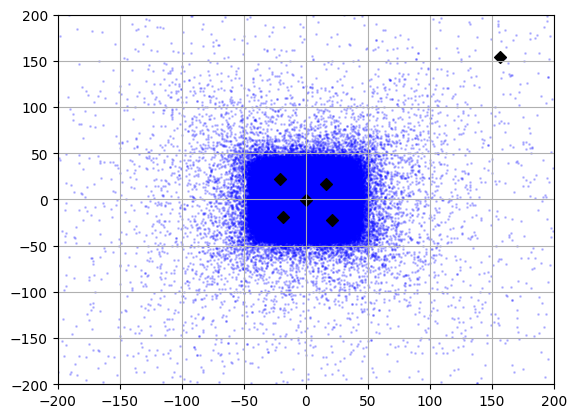

In [33]:
model_KMeans = KMeans(n_clusters=int(clusterNumbers))
y_KMeans = model_KMeans.fit(tranformed_umap_all)
label = model_KMeans.predict(tranformed_umap_all)
centroids = model_KMeans.cluster_centers_
centroids_x_umap = centroids[:,0]
centroids_y_umap = centroids[:,1]

plt.scatter(tranformed_umap_all[:,0], tranformed_umap_all[:,1], c='b', s=1, alpha=0.2)
plt.scatter(centroids_x_umap, centroids_y_umap, marker='D', c='k')
plt.yticks(fontsize=10); plt.xticks(fontsize=10); plt.grid();
plt.xlim(-200,200)
plt.ylim(-200,200)
plt.show()

In [34]:
centroids

array([[-2.0837782e+01,  2.1738462e+01],
       [ 2.1006079e+01, -2.2208254e+01],
       [-1.8164314e+01, -1.9016037e+01],
       [-4.7167334e+03, -9.2112363e+03],
       [ 7.6923743e+02, -1.2958002e+03],
       [ 1.5674367e+02,  1.5431282e+02],
       [-1.7323542e-01, -1.9049972e-01],
       [ 3.4572287e+02,  2.0227965e+03],
       [ 1.6564541e+01,  1.7151482e+01],
       [-2.4359319e+02, -1.8819060e+02]], dtype=float32)

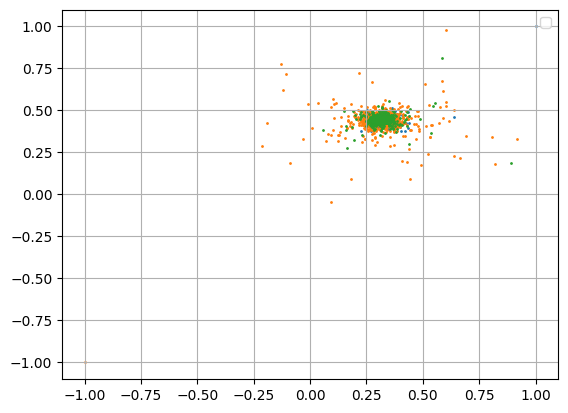

In [35]:
# Normaliza los datos entre -1 y 1
scaler = MinMaxScaler(feature_range=(-1, 1))
tranformed_umap_all_normalized = scaler.fit_transform(tranformed_umap_all)

# Genera la gráfica
plt.figure()
plt.scatter(tranformed_umap_all_normalized[label_data==0, 0], tranformed_umap_all_normalized[label_data==0, 1], s=1)
plt.scatter(tranformed_umap_all_normalized[label_data==1, 0], tranformed_umap_all_normalized[label_data==1, 1], s=1)
plt.scatter(tranformed_umap_all_normalized[label_data==2, 0], tranformed_umap_all_normalized[label_data==2, 1], s=1)

plt.legend()
plt.grid()
plt.show()

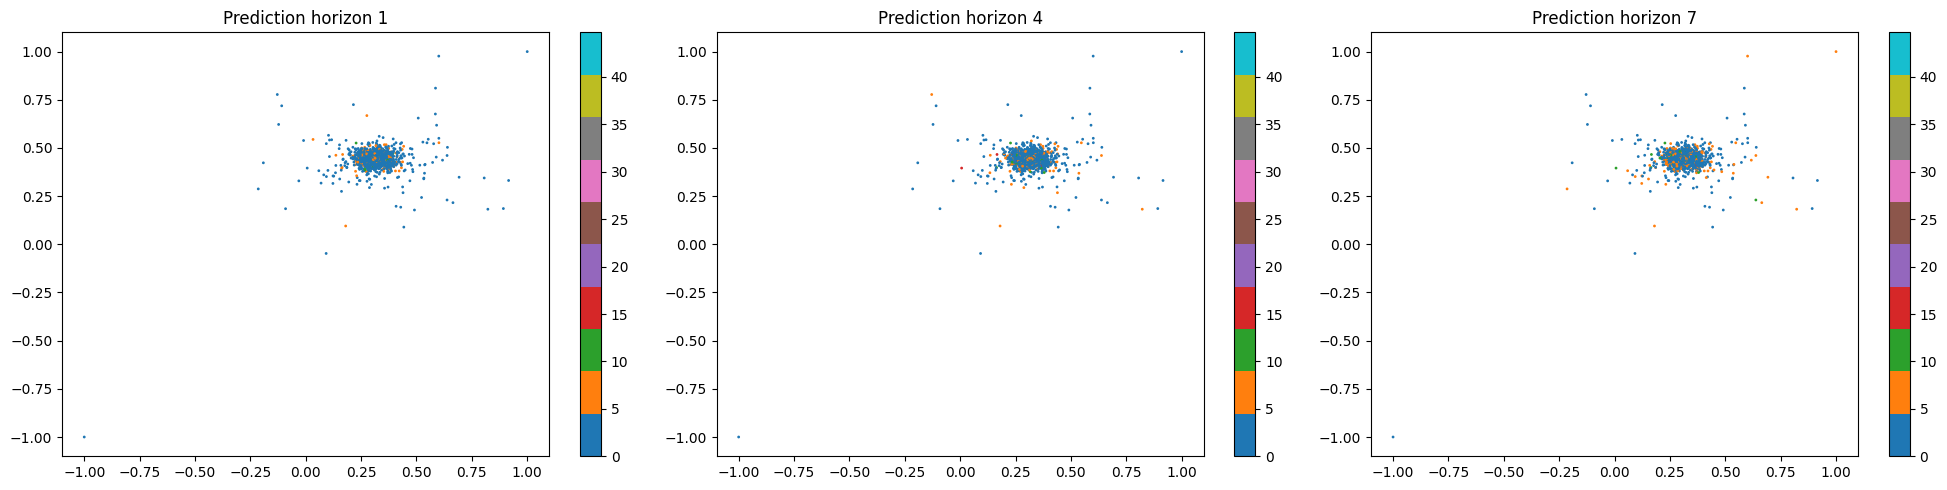

In [36]:
matriz1 = tranformed_umap_all_normalized
matriz2 = y

# Configuración de las figuras
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Primer scatter plot con color basado en el primer valor de matriz2
scatter1 = axes[0].scatter(matriz1[:, 0], matriz1[:, 1], c=matriz2[:, 0]*normalizationValue, cmap='tab10', s=1)
axes[0].set_title('Prediction horizon 1')
fig.colorbar(scatter1, ax=axes[0])

# Segundo scatter plot con color basado en el cuarto valor de matriz2
scatter2 = axes[1].scatter(matriz1[:, 0], matriz1[:, 1], c=matriz2[:, 3]*normalizationValue, cmap='tab10', s=1)
axes[1].set_title('Prediction horizon 4')
fig.colorbar(scatter2, ax=axes[1])

# Tercer scatter plot con color basado en el séptimo valor de matriz2
scatter3 = axes[2].scatter(matriz1[:, 0], matriz1[:, 1], c=matriz2[:, 6]*normalizationValue, cmap='tab10', s=1)
axes[2].set_title('Prediction horizon 7'.format())
fig.colorbar(scatter3, ax=axes[2])

# Mostrar las figuras
plt.tight_layout()
plt.show()

[Text(0, -0.30000000000000004, ''),
 Text(0, -0.20000000000000004, ''),
 Text(0, -0.10000000000000003, ''),
 Text(0, 0.0, ''),
 Text(0, 0.09999999999999998, ''),
 Text(0, 0.19999999999999996, ''),
 Text(0, 0.30000000000000004, '')]

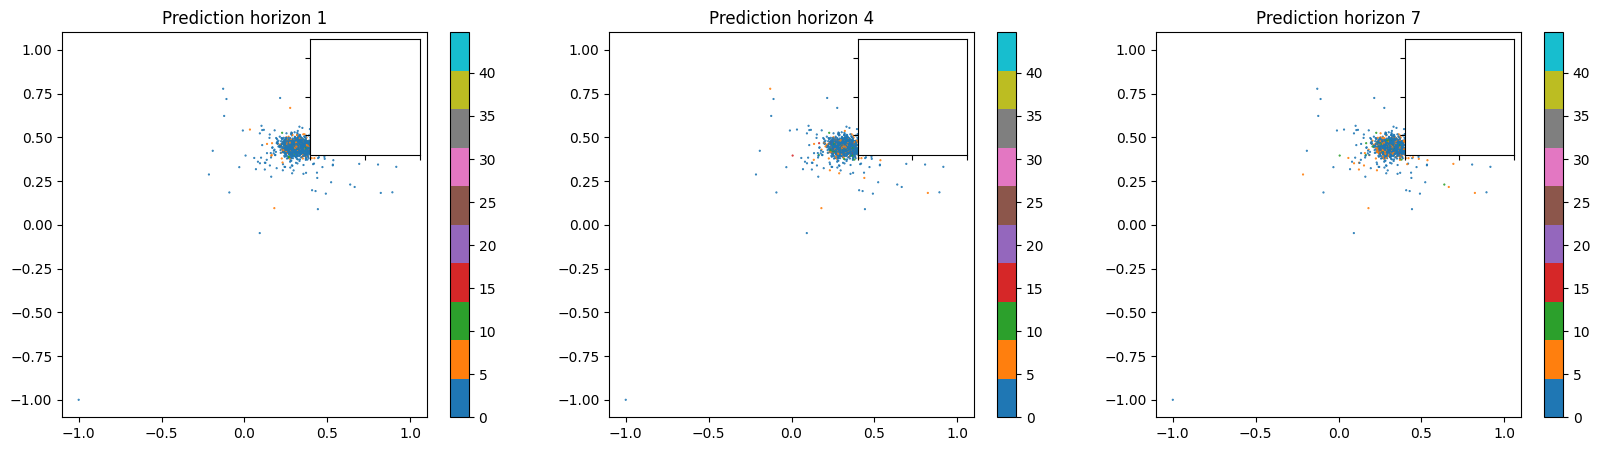

In [37]:
# Configuración de las figuras
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Primer scatter plot con color basado en el primer valor de matriz2
scatter1 = axes[0].scatter(matriz1[:, 0], matriz1[:, 1], c=matriz2[:, 0] * normalizationValue, cmap='tab10', s=0.3)
axes[0].set_title('Prediction horizon 1')
fig.colorbar(scatter1, ax=axes[0])

# Crear inset para el primer scatter plot
axins1 = inset_axes(axes[0], width="30%", height="30%", loc='upper right')
axins1.scatter(matriz1[:, 0], matriz1[:, 1], c=matriz2[:, 0] * normalizationValue, cmap='tab10', s=0.3)
# Establecer límites para el zoom
x1, x2, y1, y2 = -0.75, -0.25, -0.3, 0.3
axins1.set_xlim(x1, x2)
axins1.set_ylim(y1, y2)
axins1.set_xticklabels('')
axins1.set_yticklabels('')

# Segundo scatter plot con color basado en el cuarto valor de matriz2
scatter2 = axes[1].scatter(matriz1[:, 0], matriz1[:, 1], c=matriz2[:, 3] * normalizationValue, cmap='tab10', s=0.3)
axes[1].set_title('Prediction horizon 4')
fig.colorbar(scatter2, ax=axes[1])

# Crear inset para el segundo scatter plot
axins2 = inset_axes(axes[1], width="30%", height="30%", loc='upper right')
axins2.scatter(matriz1[:, 0], matriz1[:, 1], c=matriz2[:, 3] * normalizationValue, cmap='tab10', s=0.3)
# Establecer límites para el zoom
axins2.set_xlim(x1, x2)
axins2.set_ylim(y1, y2)
axins2.set_xticklabels('')
axins2.set_yticklabels('')

# Tercer scatter plot con color basado en el séptimo valor de matriz2
scatter3 = axes[2].scatter(matriz1[:, 0], matriz1[:, 1], c=matriz2[:, 6] * normalizationValue, cmap='tab10', s=0.3)
axes[2].set_title('Prediction horizon 7')
fig.colorbar(scatter3, ax=axes[2])

# Crear inset para el tercer scatter plot
axins3 = inset_axes(axes[2], width="30%", height="30%", loc='upper right')
axins3.scatter(matriz1[:, 0], matriz1[:, 1], c=matriz2[:, 6] * normalizationValue, cmap='tab10', s=0.3)
# Establecer límites para el zoom
axins3.set_xlim(x1, x2)
axins3.set_ylim(y1, y2)
axins3.set_xticklabels('')
axins3.set_yticklabels('')

In [38]:
def valuesPoints(predictionHorizon=0, min_value=0, max_value=10):
  array = matriz2[:,predictionHorizon]* normalizationValue
  index = np.where((array >= min_value) & (array <= max_value))[0]
  return matriz1[index]

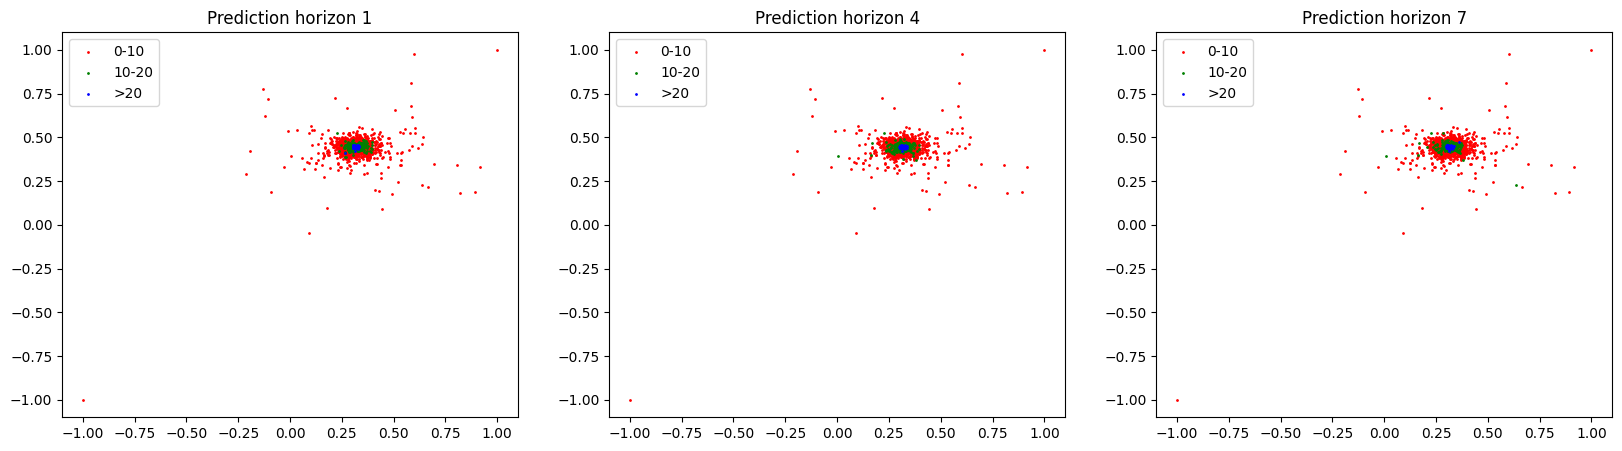

In [39]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.scatter(valuesPoints(predictionHorizon=0, min_value=0, max_value=10)[:, 0], valuesPoints(predictionHorizon=0, min_value=0,  max_value=10)[:, 1], c='r',  s=1, label="0-10")
plt.scatter(valuesPoints(predictionHorizon=0, min_value=10, max_value=20)[:, 0], valuesPoints(predictionHorizon=0, min_value=10, max_value=20)[:, 1], c='g',  s=1, label="10-20")
plt.scatter(valuesPoints(predictionHorizon=0, min_value=20, max_value=100)[:, 0], valuesPoints(predictionHorizon=0, min_value=20, max_value=100)[:, 1], c='b', s=1, label=">20")
plt.legend()
plt.title("Prediction horizon 1")

plt.subplot(132)
plt.scatter(valuesPoints(predictionHorizon=3, min_value=0, max_value=10)[:, 0], valuesPoints(predictionHorizon=3, min_value=0,  max_value=10)[:, 1], c='r',  s=1, label="0-10")
plt.scatter(valuesPoints(predictionHorizon=3, min_value=10, max_value=20)[:, 0], valuesPoints(predictionHorizon=3, min_value=10, max_value=20)[:, 1], c='g',  s=1, label="10-20")
plt.scatter(valuesPoints(predictionHorizon=3, min_value=20, max_value=100)[:, 0], valuesPoints(predictionHorizon=3, min_value=20, max_value=100)[:, 1], c='b', s=1, label=">20")
plt.legend()
plt.title("Prediction horizon 4")

plt.subplot(133)
plt.scatter(valuesPoints(predictionHorizon=6, min_value=0, max_value=10)[:, 0], valuesPoints(predictionHorizon=6, min_value=0,  max_value=10)[:, 1], c='r',  s=1, label="0-10")
plt.scatter(valuesPoints(predictionHorizon=6, min_value=10, max_value=20)[:, 0], valuesPoints(predictionHorizon=6, min_value=10, max_value=20)[:, 1], c='g',  s=1, label="10-20")
plt.scatter(valuesPoints(predictionHorizon=6, min_value=20, max_value=100)[:, 0], valuesPoints(predictionHorizon=6, min_value=20, max_value=100)[:, 1], c='b', s=1, label=">20")
plt.legend()
plt.title("Prediction horizon 7")

plt.show()

#**Forecasting**

In [ ]:
X_train = np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train.shape, X_test.shape

In [ ]:
index = None
count = 0
centroidValues_y = np.zeros((len(centroids_x_umap), len(thresholds)))
results_all = {
    "RNNSimple": {},
    "GRU": {},
    "LSTM": {}
}

for threshold in thresholds:

  print(' ---------------------------------- ', threshold, ' ---------------------------------- ')

  for j in np.arange(0,(len(centroids_x_umap))):

    # Distancia euclidea
    num = np.linalg.norm(centroids[j]-tranformed_umap_all, axis=1)**2
    result = np.where(num < threshold)

    centroidValues_y[j, count] = len(result[0])


    if index is None:
      index = result[0]
    else:
      index = np.hstack((index, result[0]))

  count += 1

  # Select sanmples
  index = list(np.unique(index))

  print(len(index))

  X_train = X[index,:]
  y_train = y[index]

  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

  print(X_train.shape)

  # Training models
  forecastingWind = ForecastingModels(X_train, y_train,
                                      X_test, y_test,
                                      neurons=neurons,
                                      batch_size=batch_size,
                                      epochs=epochs,
                                      n_splits=n_splits)

  # Create models
  model_RNNSimple = forecastingWind.RNNSimple_Model()
  model_GRU = forecastingWind.GRU_Model()
  model_LSTM = forecastingWind.LSTM_Model()

  # Train models
  results_RNNSimple, weights_RNNSimple = forecastingWind.time_series_cv(model_RNNSimple)
  results_GRU, weights_GRU = forecastingWind.time_series_cv(model_GRU)
  results_LSTM, weights_LSTM = forecastingWind.time_series_cv(model_LSTM)

  # Guardar los resultados y pesos en el diccionario
  results_all["RNNSimple"][threshold] = {"results": results_RNNSimple, "weights": weights_RNNSimple}
  results_all["GRU"][threshold] = {"results": results_GRU, "weights": weights_GRU}
  results_all["LSTM"][threshold] = {"results": results_LSTM, "weights": weights_LSTM}


#**Results**

In [ ]:
import pickle
with open('/content/drive/MyDrive/Codes/Papers/Predictive Modeling Using a Clustering-Based Approach/Proofs/Results/Chengdu_Airport_China.pkl', 'wb') as file:
    pickle.dump(results_all, file)